In [3]:
import torch
import numpy as np
from matplotlib import pyplot as plt

In [4]:
%matplotlib notebook

In [5]:
plt.style.use('scientific')
torch.manual_seed(42);

In [6]:
T, Tr = 250, 20

# Spiking Matrix

In [7]:
from rsnn.ss.utils import get_spiking_matrix, get_phi0

<IPython.core.display.Javascript object>


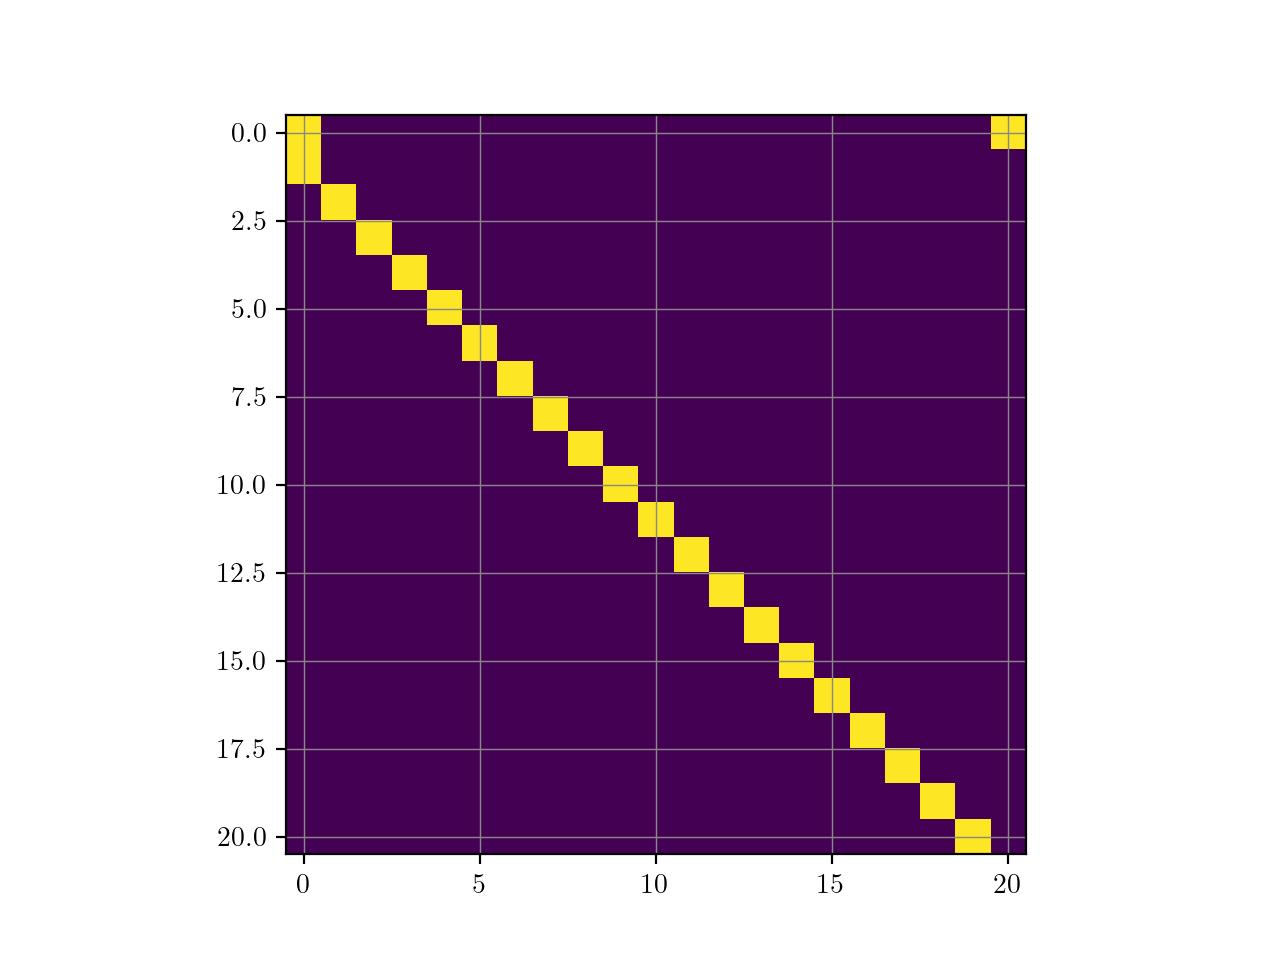

In [8]:
plt.figure()
plt.imshow(get_spiking_matrix(Tr))
plt.show()

In [9]:
f"The spectral radius for Tr={Tr} is phi0={get_phi0(Tr)}"

'The spectral radius for Tr=20 is phi0=1.1144648799534793'

# Counting

In [11]:
from rsnn.ss.utils import get_cardinality

In [44]:
f"There are {get_cardinality(T, Tr, approx=False)} spike sequences with length {T} and refractory period {Tr}"

'There are inf spike sequences with length 2000 and refractory period 2'

In [45]:
f"There are around {get_cardinality(T, Tr, approx=True)} spike sequences with length {T} and refractory period {Tr}"

OverflowError: (34, 'Result too large')

# Sampling

In [14]:
from rsnn.ss.rand import rand_ss

In [30]:
ss = rand_ss(1, 100000, 10, 0.5)
ss.sum() / (100000 - ss.sum() * 10) 

tensor(0.4949)

In [27]:
ss = rand_ss(1, 10000, 10, 0.8)
ss.sum() / (10000 - ss.sum() * 10)

tensor(0.8009)

In [28]:
ss = rand_ss(1, 10000, 10, 0.2)
ss.sum() / (10000 - ss.sum() * 10)

tensor(0.1976)

In [19]:
s_ids = torch.argwhere(rand_ss(1, T, Tr, 0.95))[:, 1].numpy()

<IPython.core.display.Javascript object>


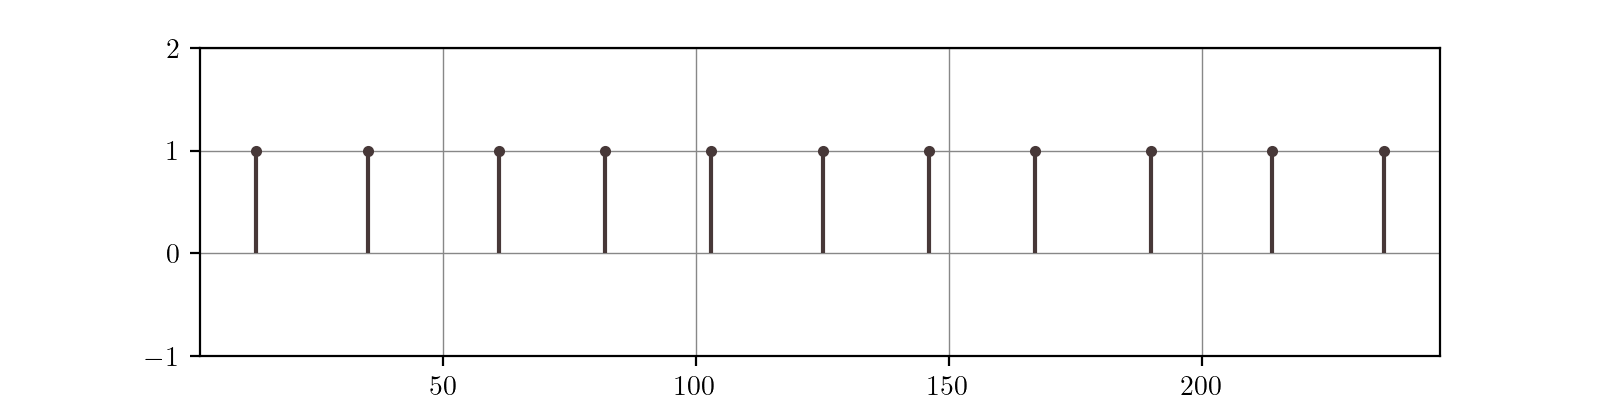

In [20]:
plt.figure(figsize=(8, 2))
plt.stem(s_ids, np.ones_like(s_ids), basefmt=" ", linefmt="C0-", markerfmt="C0.")
plt.ylim(-1, 2)
plt.show()

# Marginal and Empirical Number of Spikes

In [21]:
spike_sequences = sample_spike_sequences(200, 10, 1000)

In [22]:
spike_sequences.float().mean(), 1/(get_phi0(10)**(11) + 10)

(tensor(0.0608), 0.060876747580960344)

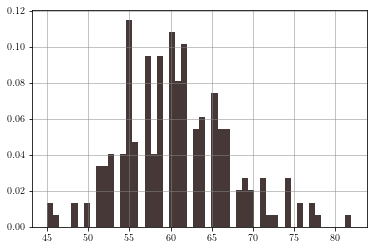

In [27]:
_ = plt.hist(spike_sequences.float().sum(dim=1).numpy(), bins=50, density=True)

In [23]:
A = torch.tensor([[1, 0, 1], [0, 0, 1], [0, 0, 1]])
A.matrix_power(10)

tensor([[ 1,  0, 10],
        [ 0,  0,  1],
        [ 0,  0,  1]])